**Bagian ini adalah bagian inisialisasi library yang digunakan**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**saya menggunakan google colab dalam pembuatan predict_house ini adalah bagian dimana saya import data menggunakan google drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Reading Data**

In [3]:
df = pd.read_csv("/content/drive/My Drive/data set/house price/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Data Exploration**

In [4]:
df = df.drop(['id','date'],axis = 1)
df.head()



,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.describe()



,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

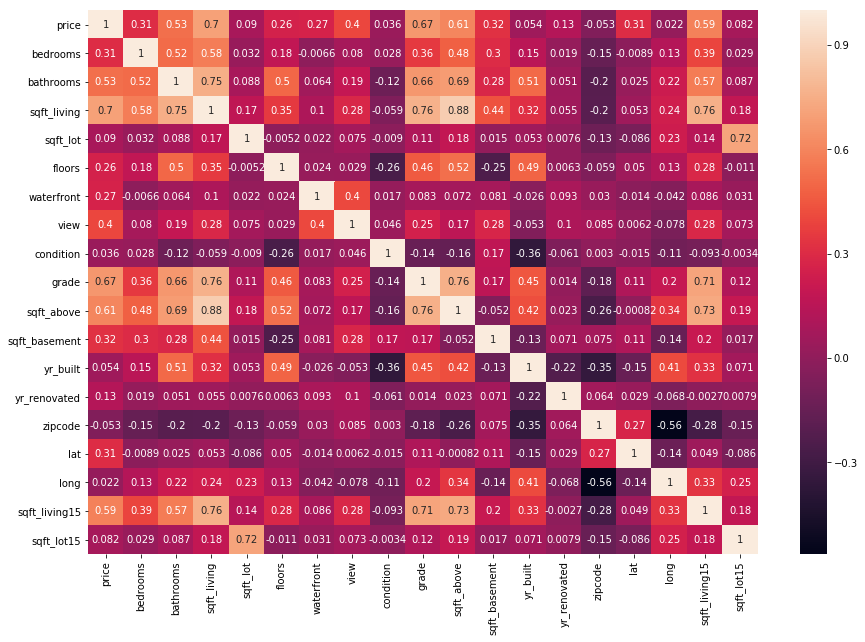

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot= True)

In [8]:
cdf = df[['price','bathrooms','sqft_above','grade']]
cdf.head()

,price,bathrooms,sqft_above,grade
0,221900.0,1.00,1180,7
1,538000.0,2.25,2170,7
2,180000.0,1.00,770,6
3,604000.0,3.00,1050,7
4,510000.0,2.00,1680,8


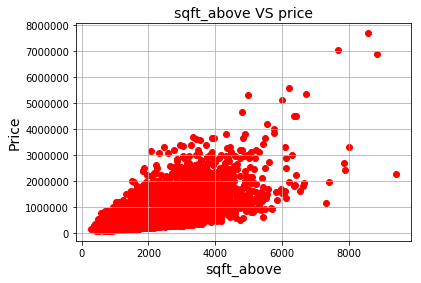

In [9]:
plt.scatter(df.sqft_above,df.price,color='red')
plt.title('sqft_above VS price',fontsize=14)
plt.xlabel('sqft_above',fontsize=14)
plt.ylabel('Price',fontsize=14)
plt.grid(True)
plt.show()

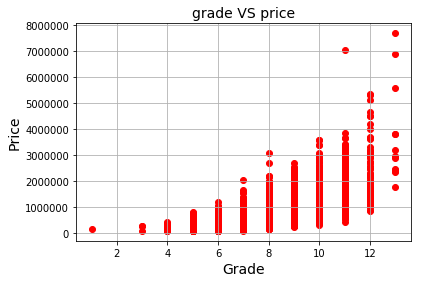

In [10]:
plt.scatter(df.grade,df.price,color='red')
plt.title('grade VS price',fontsize=14)
plt.xlabel('Grade',fontsize=14)
plt.ylabel('Price',fontsize=14)
plt.grid(True)
plt.show()

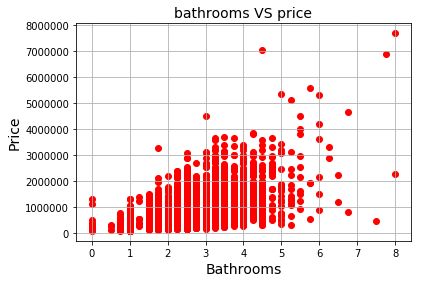

In [11]:
plt.scatter(df.bathrooms,df.price,color='red')
plt.title('bathrooms VS price',fontsize=14)
plt.xlabel('Bathrooms',fontsize=14)
plt.ylabel('Price',fontsize=14)
plt.grid(True)
plt.show()

**Creating train and test Dataset**

In [0]:
from sklearn.model_selection import train_test_split

msk = np.random.rand(len(df)) < 0.55
train = cdf[msk]
test = cdf[~msk]

**Modeling**

In [13]:
#yang diambil sqft_above(0.88),grade(0.76),bathrooms(0.75)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
train_x = np.asanyarray(train[['bathrooms','sqft_above','grade']])
train_y = np.asanyarray(train[['price']])
reg.fit(train_x,train_y)

print ('Intercept: \n', reg.intercept_)
print ('Coefiesien: \n', reg.coef_)


Intercept: 
 [-805310.93458883]
Coefiesien: 
 [[3.81239469e+04 9.09113010e+01 1.44045593e+05]]


## **Example Predict_house With Multiple Linear Regresion**

In [14]:
#predict with sklearn
#yang diambil sqft_above(0.88),grade(0.76),bathrooms(0.75)

sqft_above  = 1120
#square footage of house apart from basement

grade = 7
#overall grade given to the housing unit, based on King County grading system

bathrooms = 5
#Number of bathrooms/House

print ('Harga Rumah berdasarkan Variable: \n',reg.predict([[bathrooms,sqft_above ,grade]]))


Harga Rumah berdasarkan Variable: 
 [[495448.60744974]]


## **Evaluation**

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['bathrooms','sqft_above','grade']])
test_y = np.asanyarray(test[['price']])
predict_y = reg.predict(test_x)

print ('Mean eror : %.2f'% np.mean(np.absolute(predict_y - test_y)))
print ('R2-Score : %.2f'% r2_score(predict_y , test_y))

#nilai terbaik dari model ini adalah 0.00 dan paling kecil -0.14 /

Mean eror : 171503.86
R2-Score : -0.11
